In [1]:
%matplotlib inline
from phase_plane import PhasePlaneInteractive
import numpy as np
from tvb.simulator.lab import *
import matplotlib.pyplot as plt
from scipy.signal import welch, hamming
import pandas as pd
from one_region_simu import *
from plot_util import *

In [47]:
# integ = integrators.HeunDeterministic(dt=0.1)
dt = 0.1
# nois = noise.Multiplicative(nsig = np.array([0.004]), b=equations.Gaussian(parameters={"amp": 1.0,
                                                                                      # "sigma": 0.2,
                                                                                      # "midpoint": 0.0,
                                                                                      # "offset": 1.0}))
nois = noise.Multiplicative(nsig = np.array([0.0004]), b=equations.Gaussian())
# integ = integrators.HeunStochastic(dt=dt, noise=nois)
integ = integrators.HeunDeterministic(dt=dt)
params = config_params(nsig=0.0004,sigma=1,c_ee=11.57199543729056,c_ei= 10.307919639315172,
                       c_ie= 9.477017434965216,c_ii=7.4836638161762013,a_e=1.3,b_e=2.8,
                       c_e=7.0,a_i=2.0,alpha_e=1)
# params = config_params(})
mod = config_model(params)

   INFO  Generating an interactive phase-plane plot for WilsonCowan


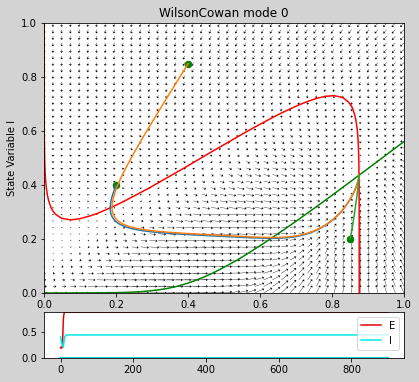

In [48]:
if 'HeunDeter' in str(integ):
    traj_steps = 4096
else:
    traj_steps = 1024
ppi_fig = PhasePlaneInteractive(model=mod, integrator=integ, traj_steps=9000)#traj_steps)
ppi_fig.show()

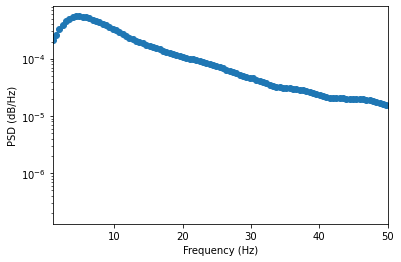

In [39]:
data = np.squeeze(ppi_fig.traj[:,0,:,:])
# (f, Pxxf) = plot_psd(data[:500], dt=dt)
# (f, Pxxf) = plot_psd(data, dt=dt,nfft=2048)
f, Pxxf = welch(data, fs=1000, window='hamming',nfft=2048)
plt.semilogy(f, Pxxf, '-o')
plt.xlim([1, 50])
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB/Hz)')
plt.show()

In [14]:
type(freq)

float

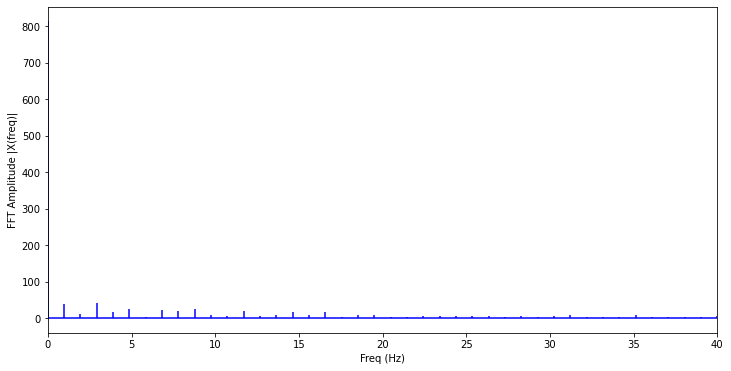

In [19]:
from numpy.fft import fft, ifft

X = fft(data)
sr=1000
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T

plt.figure(figsize = (12, 6))

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 40)
plt.show()

In [9]:
from scipy.signal import find_peaks
find_peaks(np.squeeze(Pxxf[:20]))

(array([ 1,  3,  7, 12, 16]), {})

In [16]:
mod = config_model(params)
region = config_one_region()
surface = config_surface(region)
sim = config_simulator(params, region, surface, integ_mode='stochastic', simu_length=15000)
savg_time, savg_data = run_simulation(sim, params, return_signal=True)
savg_t = np.squeeze(np.array(savg_time))
savg = np.squeeze(np.array(savg_data))

WARNING  File 'hemispheres' not found in ZIP.
   INFO  White noise configured with dt=0.1


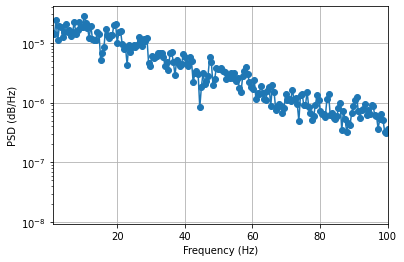

In [17]:
(f, Pxxf) = plot_psd(savg,dt = 1)

In [ ]:
plot_result(savg_t, savg, [0,len(savg_t)-1],'s')

In [52]:
idx = (np.abs(f - 100)).argmin()

In [12]:
np.argmax(Pxxf[:idx])

1

In [14]:
f[1]

9.765625

In [2]:
import os
os.getcwd()

'/mnt/user/drive/My Libraries/tutorials&explorations'

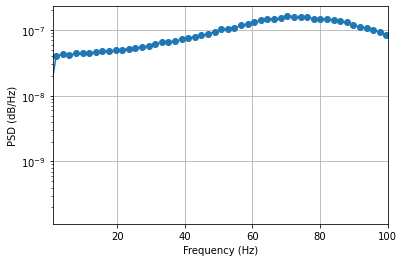

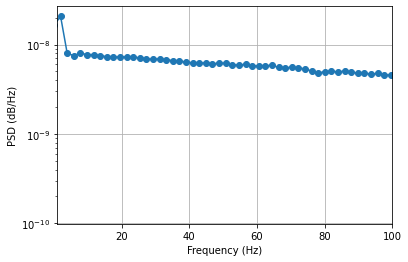

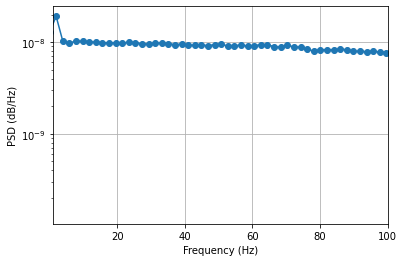

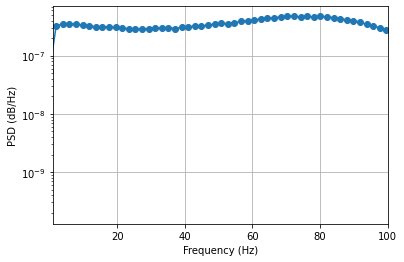

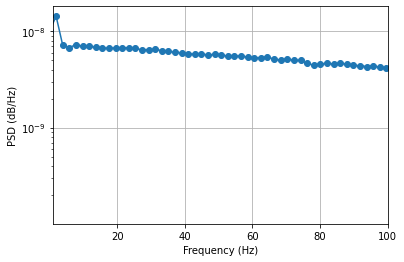

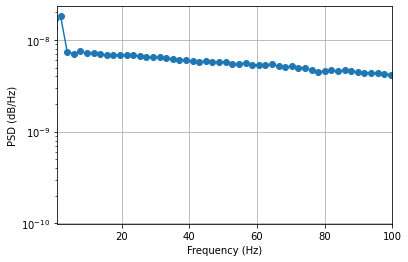

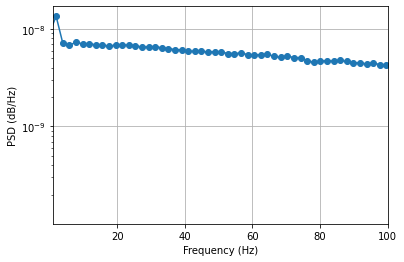

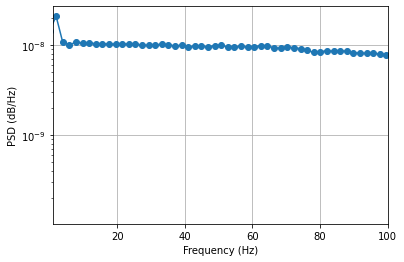

In [24]:
u = os.listdir(path='/mnt/user/drive/My Libraries/tutorials&explorations/data')
for file in u:
    if 'csv' in file:
        result_name = os.path.join('/mnt/user/drive/My Libraries/tutorials&explorations/data/', file)
        df = pd.read_csv(result_name, header = None)
        time = df[0].to_numpy()
        data = df[1].to_numpy()
        _,_ = plot_psd(data,dt = 2**-1)

In [1]:
from evaluation import *
result_name = '/mnt/user/drive/My Libraries/tutorials&explorations/data/2022-06-13_c_ee11.571995413729056_c_ei10.307919639315172_results.csv'
# df = pd.read_csv(result_name, header = None)
# time = df[0].to_numpy()
# data = df[1].to_numpy()
dfa_analysis(result_name, dt=2**-1)

Creating RawArray with float64 data, n_channels=1, n_times=2000000
    Range : 0 ... 1999999 =      0.000 ...  1000.000 secs
Ready.
0
0
0
0
0
0


(0.2532213367419578,
 {'delta': 0.905522601753671,
  'theta': 0.5368635203237111,
  'alpha': 0.654857159492314,
  'beta': 0.8081834309179935,
  'gamma': 0.7713560443161668,
  'raw': 0.6281880665874129,
  'dfa_this_trial': array([0.62818807])},
 0.9765625)

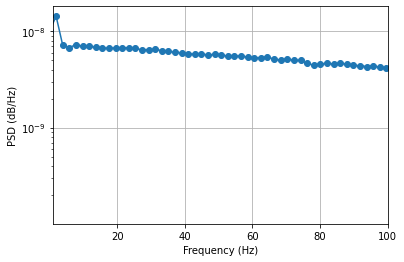

In [26]:
f, Pxxf = plot_psd(data,dt = 2**-1)

In [28]:
f[1]

1.953125

In [42]:
def plot_result(time, signal, interval, t_unit='ms'):
    #Plot region averaged time series
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)
    if signal.ndim == 4:
        ax.plot(time[interval[0]:interval[-1]], signal[interval[0]:interval[-1], 0, :, 0])
    elif signal.ndim == 1:
        ax.plot(time[interval[0]:interval[-1]], signal[interval[0]:interval[-1]])
    else:
        print("Dimension should be 4 or 1!")
        return None
    plt.title("Region average")
    plt.xlabel("time/"+t_unit)
    #Show them
    plt.show()

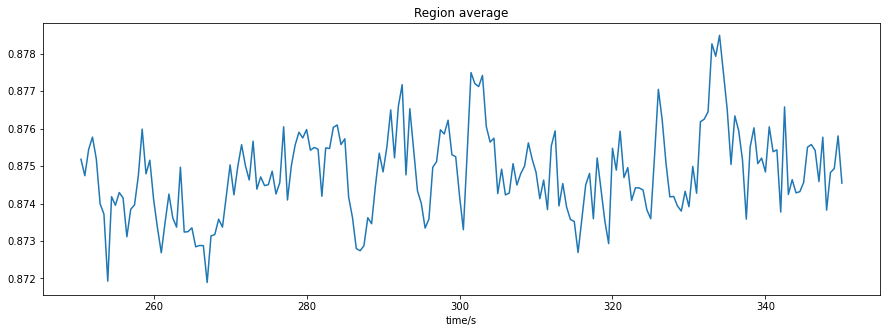

In [44]:
plot_result(time, data, [500,800])

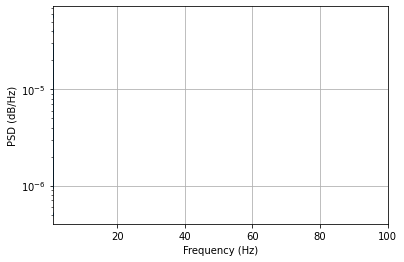

In [ ]:
plot_psd(data, fs = 2**-1)